In [16]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import json

from config import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


637


In [18]:
#city list needs to be fixed to be able to build URLs without empty spaces for those cities with two or more words in their name
cities_for_url=[]

for x in cities:
    y=x.replace(" ","%20")
    cities_for_url.append(y)
    
cities_for_url

['ponta%20delgada',
 'belushya%20guba',
 'busselton',
 'taolanaro',
 'hermanus',
 'barentsburg',
 'puerto%20ayora',
 'tyrma',
 'sistranda',
 'saint-philippe',
 'adrar',
 'port%20lincoln',
 'mys%20shmidta',
 'ituni',
 'upernavik',
 'salima',
 'muncar',
 'sarakhs',
 'itarema',
 'zyryanka',
 'somerset',
 'lata',
 'cape%20town',
 'vigrestad',
 'ayan',
 'duluth',
 'kavaratti',
 'vestmanna',
 'ushuaia',
 'illoqqortoormiut',
 'markova',
 'bayir',
 'waipawa',
 'lorengau',
 'dipkarpaz',
 'smithers',
 'khromtau',
 'garmsar',
 'castro',
 'palabuhanratu',
 'charters%20towers',
 'bredasdorp',
 'chama',
 'tuatapere',
 'chapais',
 'dikson',
 'sao%20joao%20da%20barra',
 'tual',
 'bluff',
 'ust-kuyga',
 'ambon',
 'una',
 'springbok',
 'jamestown',
 'mataura',
 'nyimba',
 'tiksi',
 'punta%20arenas',
 'qaanaaq',
 'arraial%20do%20cabo',
 'vao',
 'brewster',
 'taoudenni',
 'turkan',
 'tura',
 'angoram',
 'evensk',
 'mpika',
 'kapaa',
 'le%20port',
 'balasing',
 'bargal',
 'rikitea',
 'eyrarbakki',
 'saskyl

In [27]:
api_key = "3b3e1d7845d02897a766921cd3808fa3"
units="imperial"

latitude=[]
temp=[]
humidity=[]
wind=[]
cloud=[]

i=1

for name in cities_for_url:
    url='http://api.openweathermap.org/data/2.5/weather?q='
    query_url = f'{url}{name}&appid={api_key}&units={units}'
    
    response = requests.get(query_url)
    response_json = response.json()
    try:
        latitude.append(response_json['coord']['lat'])
        temp.append(response_json['main']['temp'])
        humidity.append(response_json['main']['humidity'])
        wind.append(response_json['wind']['speed'])
    except KeyError:
        i=i+1
print(f'there are {i} cities not found')

there are 55 cities not found


In [39]:
weather_dict={"Latitude":latitude,
             "Temp (F)":temp,
             "Humidity (%)":humidity,
             "Windspeed (mph)":wind}
weather_df=pd.DataFrame(weather_dict)
weather_df

,Latitude,Temp (F),Humidity (%),Windspeed (mph)
0,37.7333,59.50,88,3.44
1,-33.6500,60.62,85,1.01
2,-34.4187,70.00,79,7.00
3,-0.7393,82.18,74,11.50
4,50.0833,6.91,92,8.01
...,...,...,...,...
578,20.8624,67.44,93,3.80
579,34.6381,67.62,64,21.85
580,49.6835,-2.20,71,4.61
581,29.5581,62.60,48,9.22


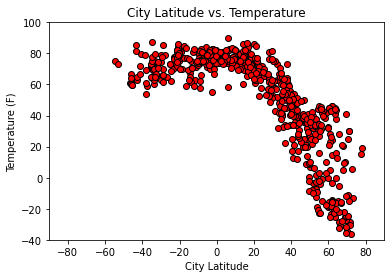

In [48]:
plt.scatter(latitude, temp, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.ylim(-40,100)

plt.show()

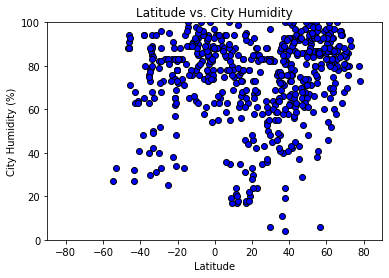

In [59]:
plt.scatter(latitude, humidity, marker="o", facecolors="b", edgecolors="black")
plt.title("Latitude vs. City Humidity")
plt.ylabel("City Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(0,100)

plt.show()

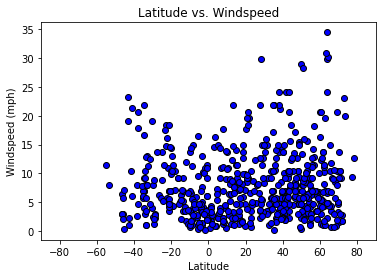

In [61]:
plt.scatter(latitude, wind, marker="o", facecolors="b", edgecolors="black")
plt.title("Latitude vs. Windspeed")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,90)

plt.show()

In [92]:
n_lat=[]
s_lat=[]
for var in latitude:
    if var>=0:
       n_lat.append(var)
    else:
        s_lat.append(var)
len(n_lat)

407

In [94]:
n_lat_df=pd.DataFrame(n_lat)
n_lat_df["Latitude"]=n_lat_df
n_lat_df
north_df=pd.merge(weather_df,n_lat_df, on="Latitude")
north_df

,Latitude,Temp (F),Humidity (%),Windspeed (mph),0
0,37.7333,59.50,88,3.44,37.7333
1,50.0833,6.91,92,8.01,50.0833
2,63.7256,44.60,93,29.93,63.7256
3,20.5022,60.96,30,9.78,20.5022
4,72.7868,5.59,92,23.04,72.7868
...,...,...,...,...,...
404,20.8624,67.44,93,3.80,20.8624
405,34.6381,67.62,64,21.85,34.6381
406,49.6835,-2.20,71,4.61,49.6835
407,29.5581,62.60,48,9.22,29.5581


In [102]:
s_lat_df=pd.DataFrame(s_lat)
s_lat_df["Latitude"]=s_lat_df
s_lat_df
south_df=pd.merge(weather_df,s_lat_df, on="Latitude")
south_df

,Latitude,Temp (F),Humidity (%),Windspeed (mph),0
0,-33.6500,60.62,85,1.01,-33.6500
1,-34.4187,70.00,79,7.00,-34.4187
2,-0.7393,82.18,74,11.50,-0.7393
3,-21.3585,74.80,65,6.91,-21.3585
4,-34.7333,64.17,73,9.28,-34.7333
...,...,...,...,...,...
171,-2.1667,75.92,74,3.00,-2.1667
172,-7.4706,75.20,100,4.61,-7.4706
173,-5.1989,78.80,89,4.61,-5.1989
174,-0.6136,78.49,88,10.89,-0.6136


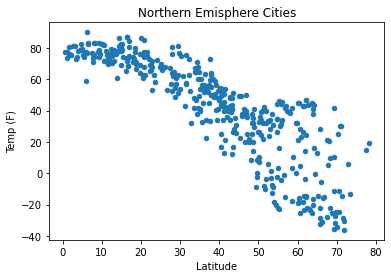

In [109]:
north_df.plot(x ='Latitude', y='Temp (F)', kind = 'scatter')
plt.title("Northern Emisphere Cities")
plt.show()

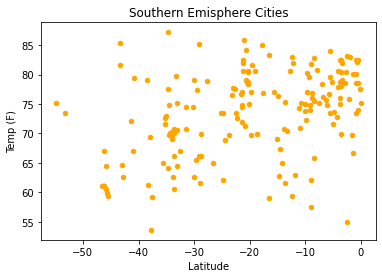

In [110]:
south_df.plot(x ='Latitude', y='Temp (F)', kind = 'scatter', color='orange')
plt.title("Southern Emisphere Cities")
plt.show()

In [ ]:
lat1=[]
temp1=[]
city1=[]
cities=[]
groupedn=[]


latitude_n=[0,1,2,4,6,8,10,40]

#for y in latitude_n:
#    bbox=f'12,{y},15,{y+7},20'
#    url2 = "http://api.openweathermap.org/data/2.5/box/city?bbox="
#    query_url2 = f'{url2}{bbox}&appid={api_key}&units={units}'
    
    
#    response = requests.get(query_url2)
#    response_json = response.json()
#    cities.append(response_json)
  
#    groupedn.extend(response_json['list'])
#    print(len(groupedn))
    
#groupedn[0]['coord']["Lat"]

In [ ]:
#for x in cities['list']:
#        lat1.append(x['coord']['Lat'])
#        temp1.append(x['main']['temp'])
#        city1.append(x['name'])


In [ ]:
templ1_dict={"city":city1,
            "lat":lat1,
            "temp":temp1}
templ1_dict=pd.DataFrame(templ1_dict)
templ1_dict

In [ ]:
latitude_s=[-8,-6,-4,-2]
for y in latitude_s:
    bbox=f'12,{y},15,{y+7},20'
    url3 = "http://api.openweathermap.org/data/2.5/box/city?bbox="
    query_url3 = f'{url3}{bbox}&appid={api_key}&units={units}'
    print(query_url3)
    

In [ ]:
response2 = requests.get(query_url3)
response_json2 = response2.json()

lat2=[]
temp2=[]
city2=[]

for x in response_json2['list']:
        lat2.append(x['coord']['Lat'])
        temp2.append(x['main']['temp'])
        city2.append(x['name'])

In [ ]:
templ2_dict={"city":city2,
            "lat":lat2,
            "temp":temp2}
templ2_dict=pd.DataFrame(templ2_dict)
templ2_dict

In [ ]:
templ=templ1_dict.append(templ2_dict, ignore_index = True) 

In [ ]:
templ

In [ ]:
plt.scatter(templ['lat'],templ['temp'])